In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("Churn.csv");
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Data Cleaning 

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"] , errors = 'coerce')
df["SeniorCitizen"] = df["SeniorCitizen"].astype('object')

In [6]:
df2 = px.data.iris()
features = ["TotalCharges", "tenure", "MonthlyCharges"]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="Churn"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [7]:
#drop unwanted column 
df.drop(['customerID'], axis=1 ,inplace = True)
df.drop(['gender'], axis=1 ,inplace = True)
df.drop(['Partner'], axis=1 ,inplace = True)
df.drop(['Dependents'], axis=1 ,inplace = True)
df.drop(['Churn'], axis=1 ,inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   MultipleLines     7043 non-null   object 
 4   InternetService   7043 non-null   object 
 5   OnlineSecurity    7043 non-null   object 
 6   OnlineBackup      7043 non-null   object 
 7   DeviceProtection  7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   StreamingTV       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7032 non-null   float64
dtypes: float64(2), int64(1), object(13)
memory

In [9]:
df.dropna(inplace=True) #removing nulls (delete any row with null value)

In [10]:
df2 = df.select_dtypes(exclude=['object'])
np.where(np.isnan(df2))
df2.fillna(df2.mean(), inplace=True)

D:\anaconda\envs\tf\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## PCA Implementation

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2) 

In [12]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [27]:
pca.explained_variance_ratio_

array([0.72659927, 0.25358707])

In [28]:
pca = PCA(n_components = 0.99)
pca_scores = pca.fit_transform(scaled_data)

Text(0, 0.5, 'Cumulative Explained Variance')

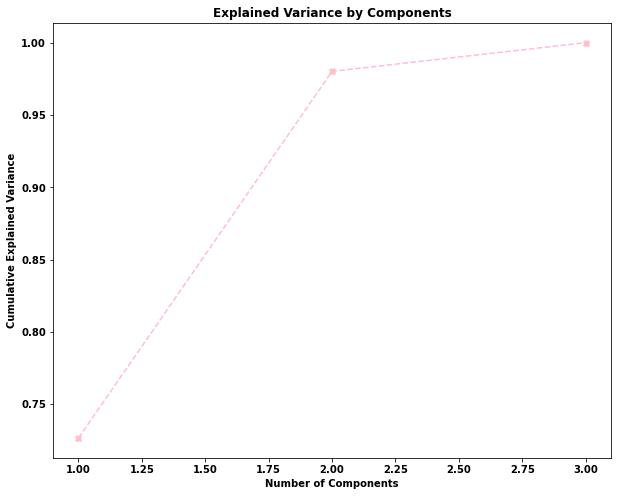

In [33]:
plt.figure(figsize=(10,8))
#to count cumulative sum of array
plt.plot(range(1,4) , pca.explained_variance_ratio_.cumsum(), marker = 'X' , linestyle = '--' , color = 'pink')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

([<matplotlib.axis.XTick at 0x2641bd872b0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

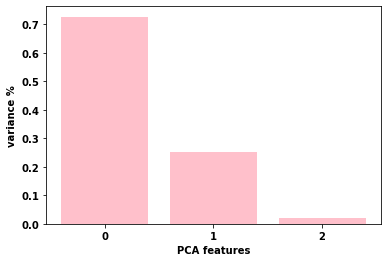

In [32]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='pink')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

## KMeans clustering with PCA
* testing with up to 7 clusters

In [42]:
# fit K means using the transformed data from PCA
wcss = []
for i in range(1,8):
    kmeans_pca = KMeans(n_clusters = i , init='k-means++' , random_state = 42)
    kmeans_pca.fit(pca_scores)
    #showing sum of squared error for each cluster 
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

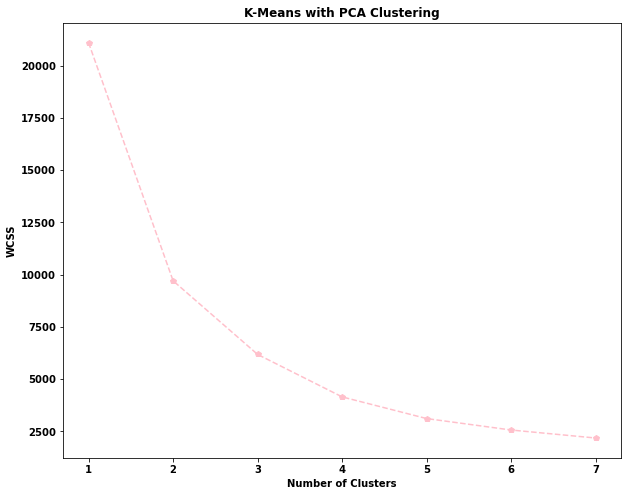

In [41]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8) , wcss, marker = 'p' , linestyle = '--' , color = 'pink')
plt.title('K-Means with PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

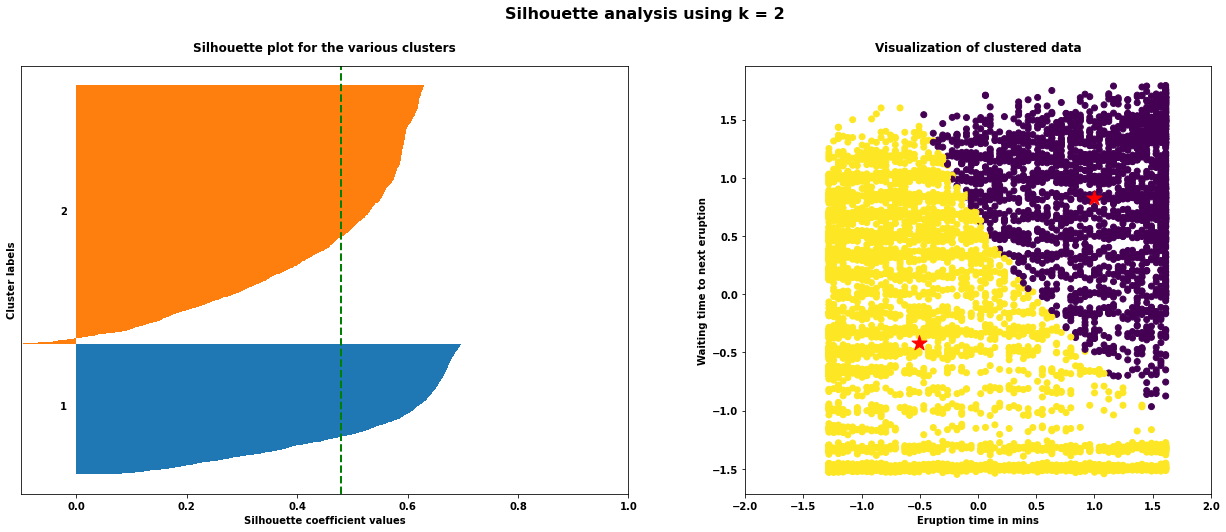

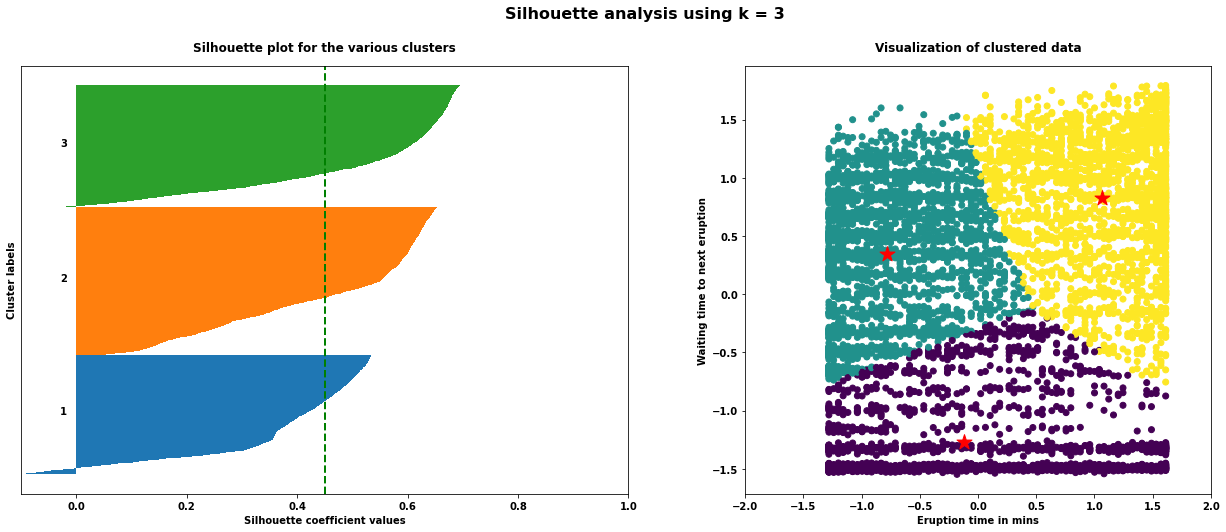

In [21]:
for i, k in enumerate([2, 3]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(scaled_data)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(scaled_data, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)
  
  # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);

    # Scatter plot of data colored with labels
    ax2.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    
    

In [89]:
kmeans_pca = KMeans(n_clusters =2 , init = 'k-means++' , random_state = 42)

kmeans_pca.fit(pca_scores)

KMeans(n_clusters=2, random_state=42)

## Analyzing results of PCA and K-Means Clustering 

In [100]:
# creating a new data frame with the original features and add the PCA scores and assigned clusters
segmentation = pd.concat([df2.reset_index(drop = True),pd.DataFrame(pca_scores)] , axis=1)
segmentation.columns.values[-2:] = ['pca_1' , 'pca_2' ]
#putting k-means clustering labels in the last columns 
segmentation['Segment K-means PCA'] = kmeans_pca.labels_

segmentation.head()

tenure  MonthlyCharges  TotalCharges     pca_1     pca_2  \
0       1           29.85         29.85 -1.951657  0.082753   
1      34           56.95       1889.50 -0.205793  0.235142   
2       2           53.85        108.15 -1.518083 -0.522542   
3      45           42.30       1840.75 -0.202412  0.891730   
4       2           70.70        151.65 -1.233269 -0.965181   

   Segment K-means PCA  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [104]:
segmentation['Segment'] = segmentation['Segment K-means PCA'].map({0:'No Churn' , 1: 'Churn'})

## Visualising by components 

D:\anaconda\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



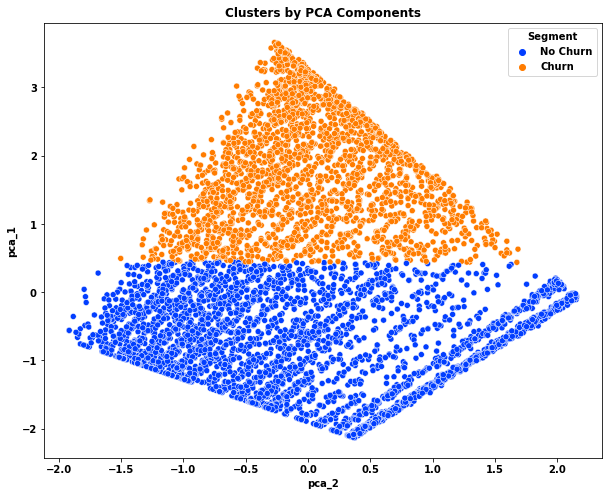

In [116]:
x_axis = segmentation['pca_2']
y_axis = segmentation['pca_1']

plt.figure(figsize = (10,8))
sns.scatterplot(x_axis , y_axis , hue = segmentation['Segment'] , palette = sns.set_palette("bright"))
plt.title('Clusters by PCA Components')
plt.show()